In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/'
M = pd.read_pickle(f'{Path}/M_all_all.pkl')
M = M[M.Source!='PRISM1'].copy()
M['log_dose']=np.log10(M['Dose'])
sources = sorted(set(M['Source']))
sources

['CTD2', 'CTPR', 'DTP', 'GDSC1', 'GDSC2', 'MR_NCI60', 'PRISM2']

In [ ]:
# Get replicate curves

In [7]:
M['key']=M['Cello']+'_'+M['PubChem_CID']+'_'+M['Source'].astype('str')

In [143]:
Mvc = M['key'].value_counts()

In [167]:
list(Mvc.index)[2000:]

['FTC133_387447_PRISM2',
 'NCIH1581_7048594_GDSC2',
 'DAOY_387447_PRISM2',
 'A2058_387447_PRISM2',
 'BFTC909_387447_PRISM2',
 'U251MG_7048594_GDSC2',
 'LU135_7048594_GDSC2',
 'P31/FUJ_462382_GDSC2',
 'LC1/SQ_7048594_GDSC2',
 'HLE_7048594_GDSC2',
 'NCIH1650_7048594_GDSC2',
 'ES8_7048594_GDSC2',
 'GI1_462382_GDSC2',
 'KS1_7048594_GDSC2',
 'JHH7_7048594_GDSC2',
 'HT1197_7048594_GDSC2',
 'ME1_7048594_GDSC2',
 'ECGI10_7048594_GDSC2',
 'MFM223_23725625_GDSC2',
 'ES4_7048594_GDSC2',
 'GCT_387447_PRISM2',
 'NCIH1651_7048594_GDSC2',
 'JHH1_7048594_GDSC2',
 'NCIH2342_462382_GDSC2',
 'HT29_71296921_DTP',
 'KYSE150_462382_GDSC2',
 'EBC1_387447_PRISM2',
 'NCIH1838_7048594_GDSC2',
 'MDAMB231_36314_DTP',
 'NCIH1693_7048594_GDSC2',
 'NCIH2141_7048594_GDSC2',
 'CA922_7048594_GDSC2',
 'CASKI_7048594_GDSC2',
 'MFE296_7048594_GDSC2',
 'MG63_7048594_GDSC2',
 'NEC8_7048594_GDSC2',
 'G361_7048594_GDSC2',
 'SW1710_7048594_GDSC2',
 'K5_7048594_GDSC2',
 'P31/FUJ_7048594_GDSC2',
 'DMS53_7048594_GDSC2',
 'HSC2_70

In [212]:
#Ms = M[M['key']=='PC14_462382_GDSC2'].copy()
#Ms = M[M['key']=='MZPC1_462382_GDSC2'].copy()
Ms = M[M['key']=='SNU1105_387447_PRISM2'].copy()

<Axes: xlabel='log_dose', ylabel='Viability'>

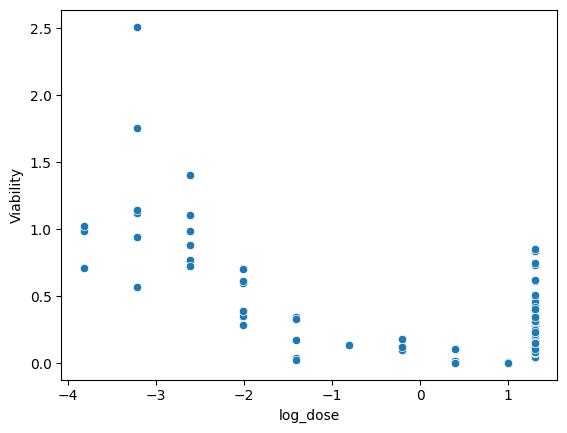

In [213]:
sns.scatterplot(data=Ms, x='log_dose', y='Viability')

In [214]:
doses = list(Ms['log_dose'].value_counts()[Ms['log_dose'].value_counts()>2].index)
Mss = Ms[Ms['log_dose'].isin(doses)].copy()

In [215]:
def get_curve(Mss, doses):
    Di=dict(zip(range(len(doses)), [np.where(Mss['log_dose']==doses[i])[0] for i in range(len(doses))])) 
    frames=[]
    for i in range(len(doses)):
        ind=np.random.choice(Di[i])
        frames.append(Mss.iloc[ind:ind+1])
    return(pd.concat(frames))

<Axes: xlabel='log_dose', ylabel='Viability'>

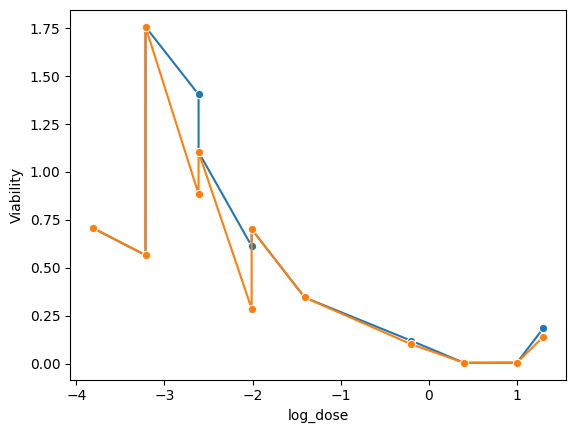

In [216]:
sns.lineplot(data=get_curve(Mss, doses), x='log_dose', y='Viability', marker='o')
sns.lineplot(data=get_curve(Mss, doses), x='log_dose', y='Viability', marker='o')

In [217]:
import sys
sys.path.append("/home/mgander/Atlantic/notebooks/Kinobeads")
import fitter
from fitter import process_dfs

In [218]:
paramss=[]
for i in tqdm(range(1000)):
    key, params, rmse, r2 = process_dfs(get_curve(Mss, doses))
    paramss.append(params)
P = pd.DataFrame(paramss, columns=['pec50', 'slope', 'back', 'front'])

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.84it/s]


In [ ]:
# GDSC2

<Axes: xlabel='pec50', ylabel='Count'>

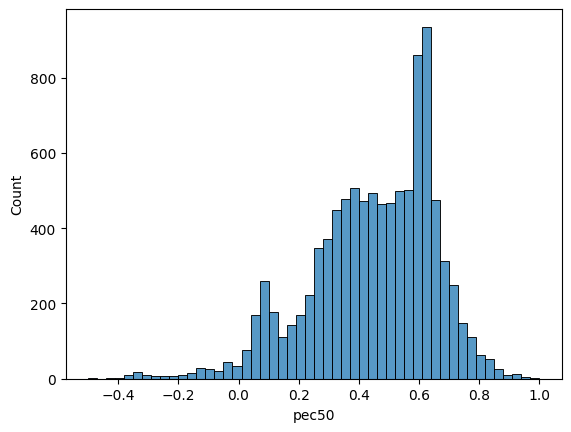

In [123]:
sns.histplot(data=P, x='pec50', bins=np.linspace(-0.5,1,51))

In [ ]:
# another GDSC2

<Axes: xlabel='pec50', ylabel='Count'>

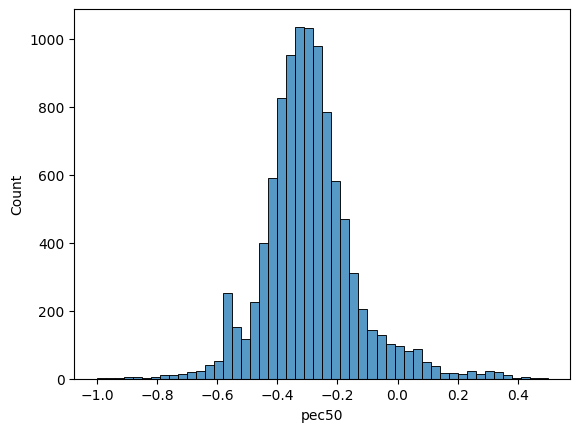

In [141]:
sns.histplot(data=P, x='pec50', bins=np.linspace(-1,0.5,51))

In [ ]:
# DTP

<Axes: xlabel='pec50', ylabel='Count'>

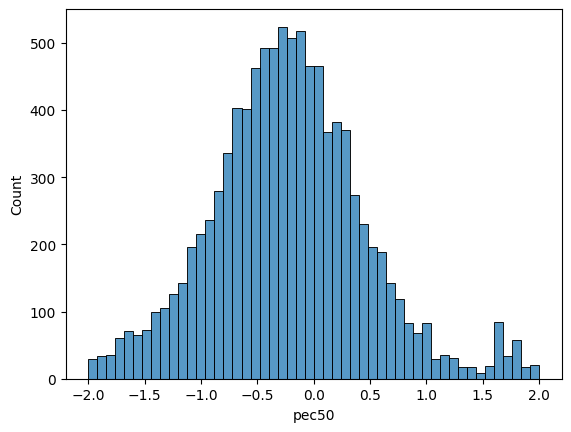

In [176]:
sns.histplot(data=P, x='pec50', bins=np.linspace(-2,2,51))

In [ ]:
# Another DPT

<Axes: xlabel='pec50', ylabel='Count'>

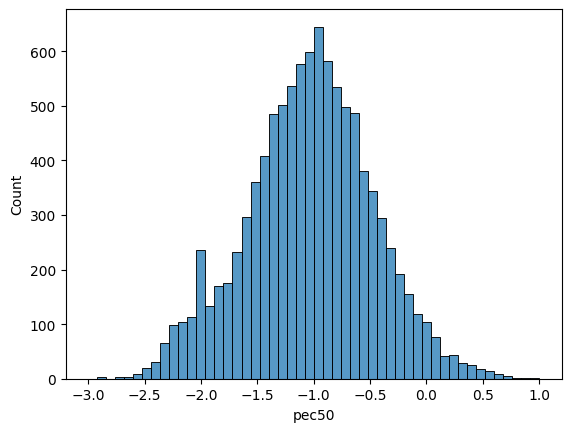

In [186]:
sns.histplot(data=P, x='pec50', bins=np.linspace(-3,1,51))

In [ ]:
# PRISM2s

<Axes: xlabel='pec50', ylabel='Count'>

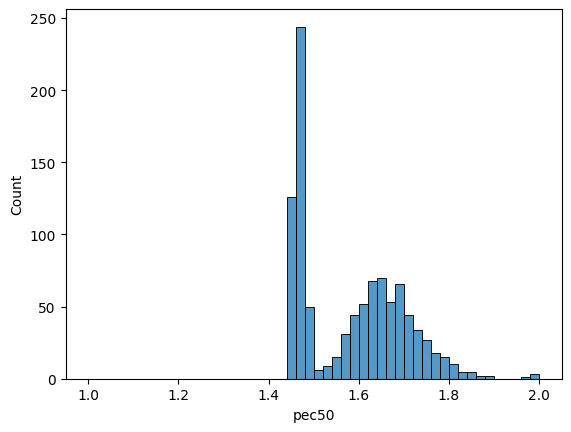

In [211]:
sns.histplot(data=P, x='pec50', bins=np.linspace(1,2,51))

<Axes: xlabel='pec50', ylabel='Count'>

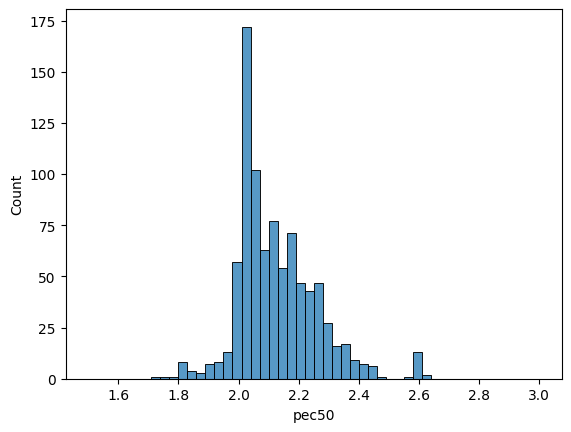

In [222]:
sns.histplot(data=P, x='pec50', bins=np.linspace(1.5,3,51))